In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.externals import joblib

import spdivik.summary as smr
smr.scale_plot_size(4.)

In [2]:
root = r"C:\Users\Grzegorz\Desktop\thyroid-cancer-cores-merged-all"
result_path = os.path.join(root, "divik-result-proteomics.jbl")
metadata_path = os.path.join(root, "metadata.csv")

In [3]:
metadata = pd.read_csv(metadata_path)
result = joblib.load(result_path)

In [4]:
smr.depth(result)

19

In [5]:
smr.total_number_of_clusters(result)

3179

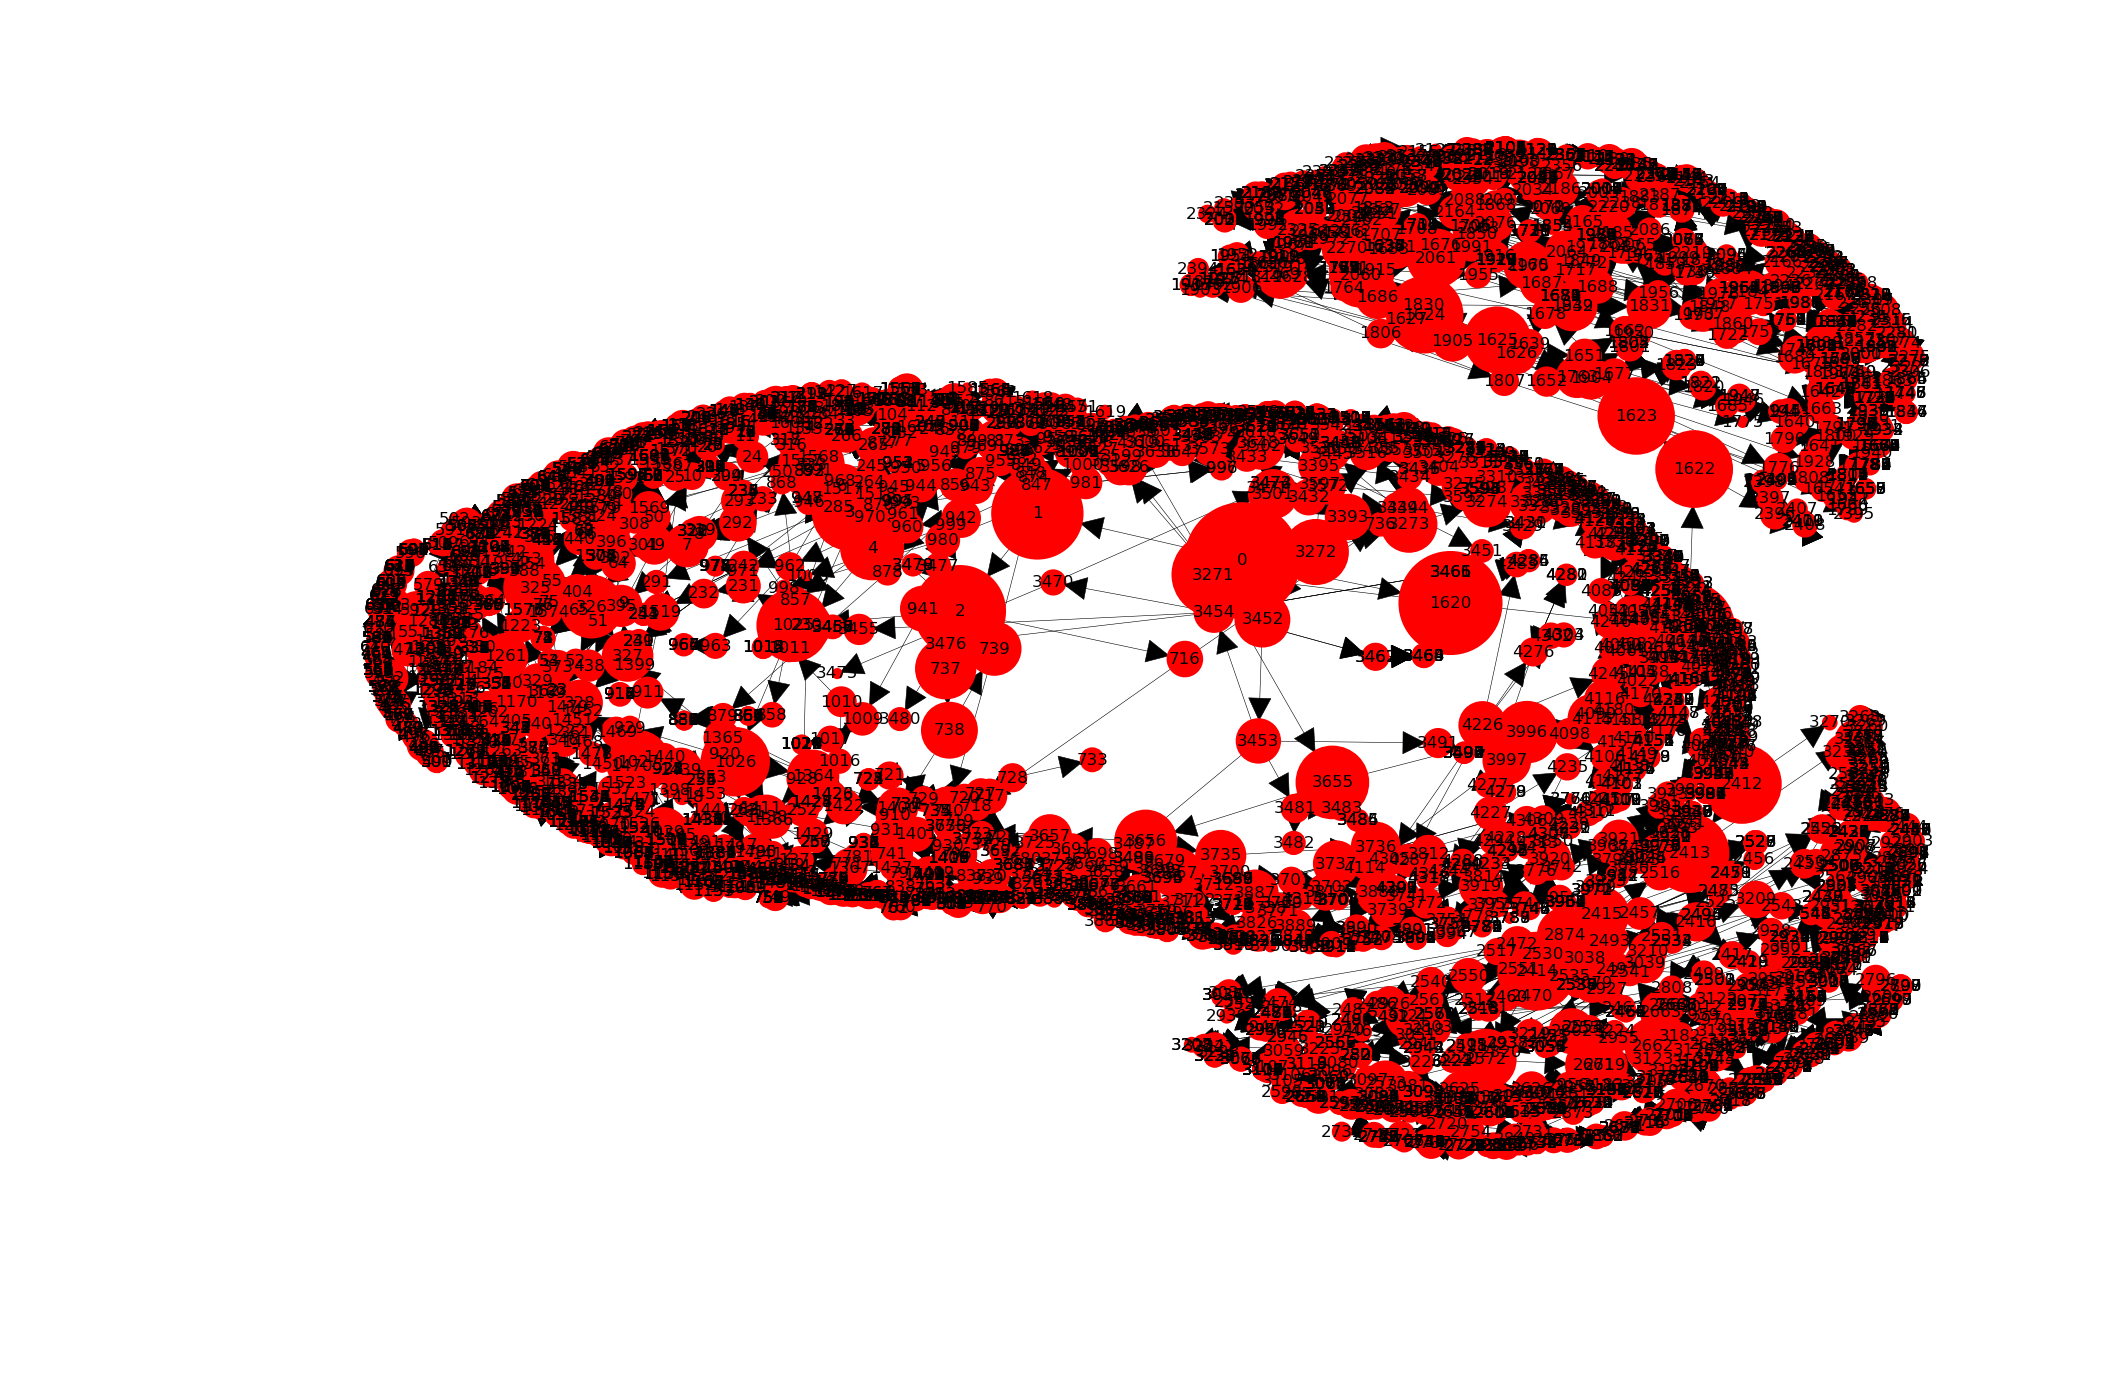

In [6]:
smr.plot(result)

In [7]:
def as_image(labels, x, y):
    x, y = np.array(x), np.array(y)
    x, y = x - x.min() + 1, y - y.min() + 1
    image = np.nan * np.zeros((y.max() + 1, x.max() + 1))
    image[y, x] = labels
    return image

['?' '????' 'ATC' 'FA' 'FAC' 'FTC' 'MTC' 'N' 'PTC' 'PTCCV' 'PTCFV']


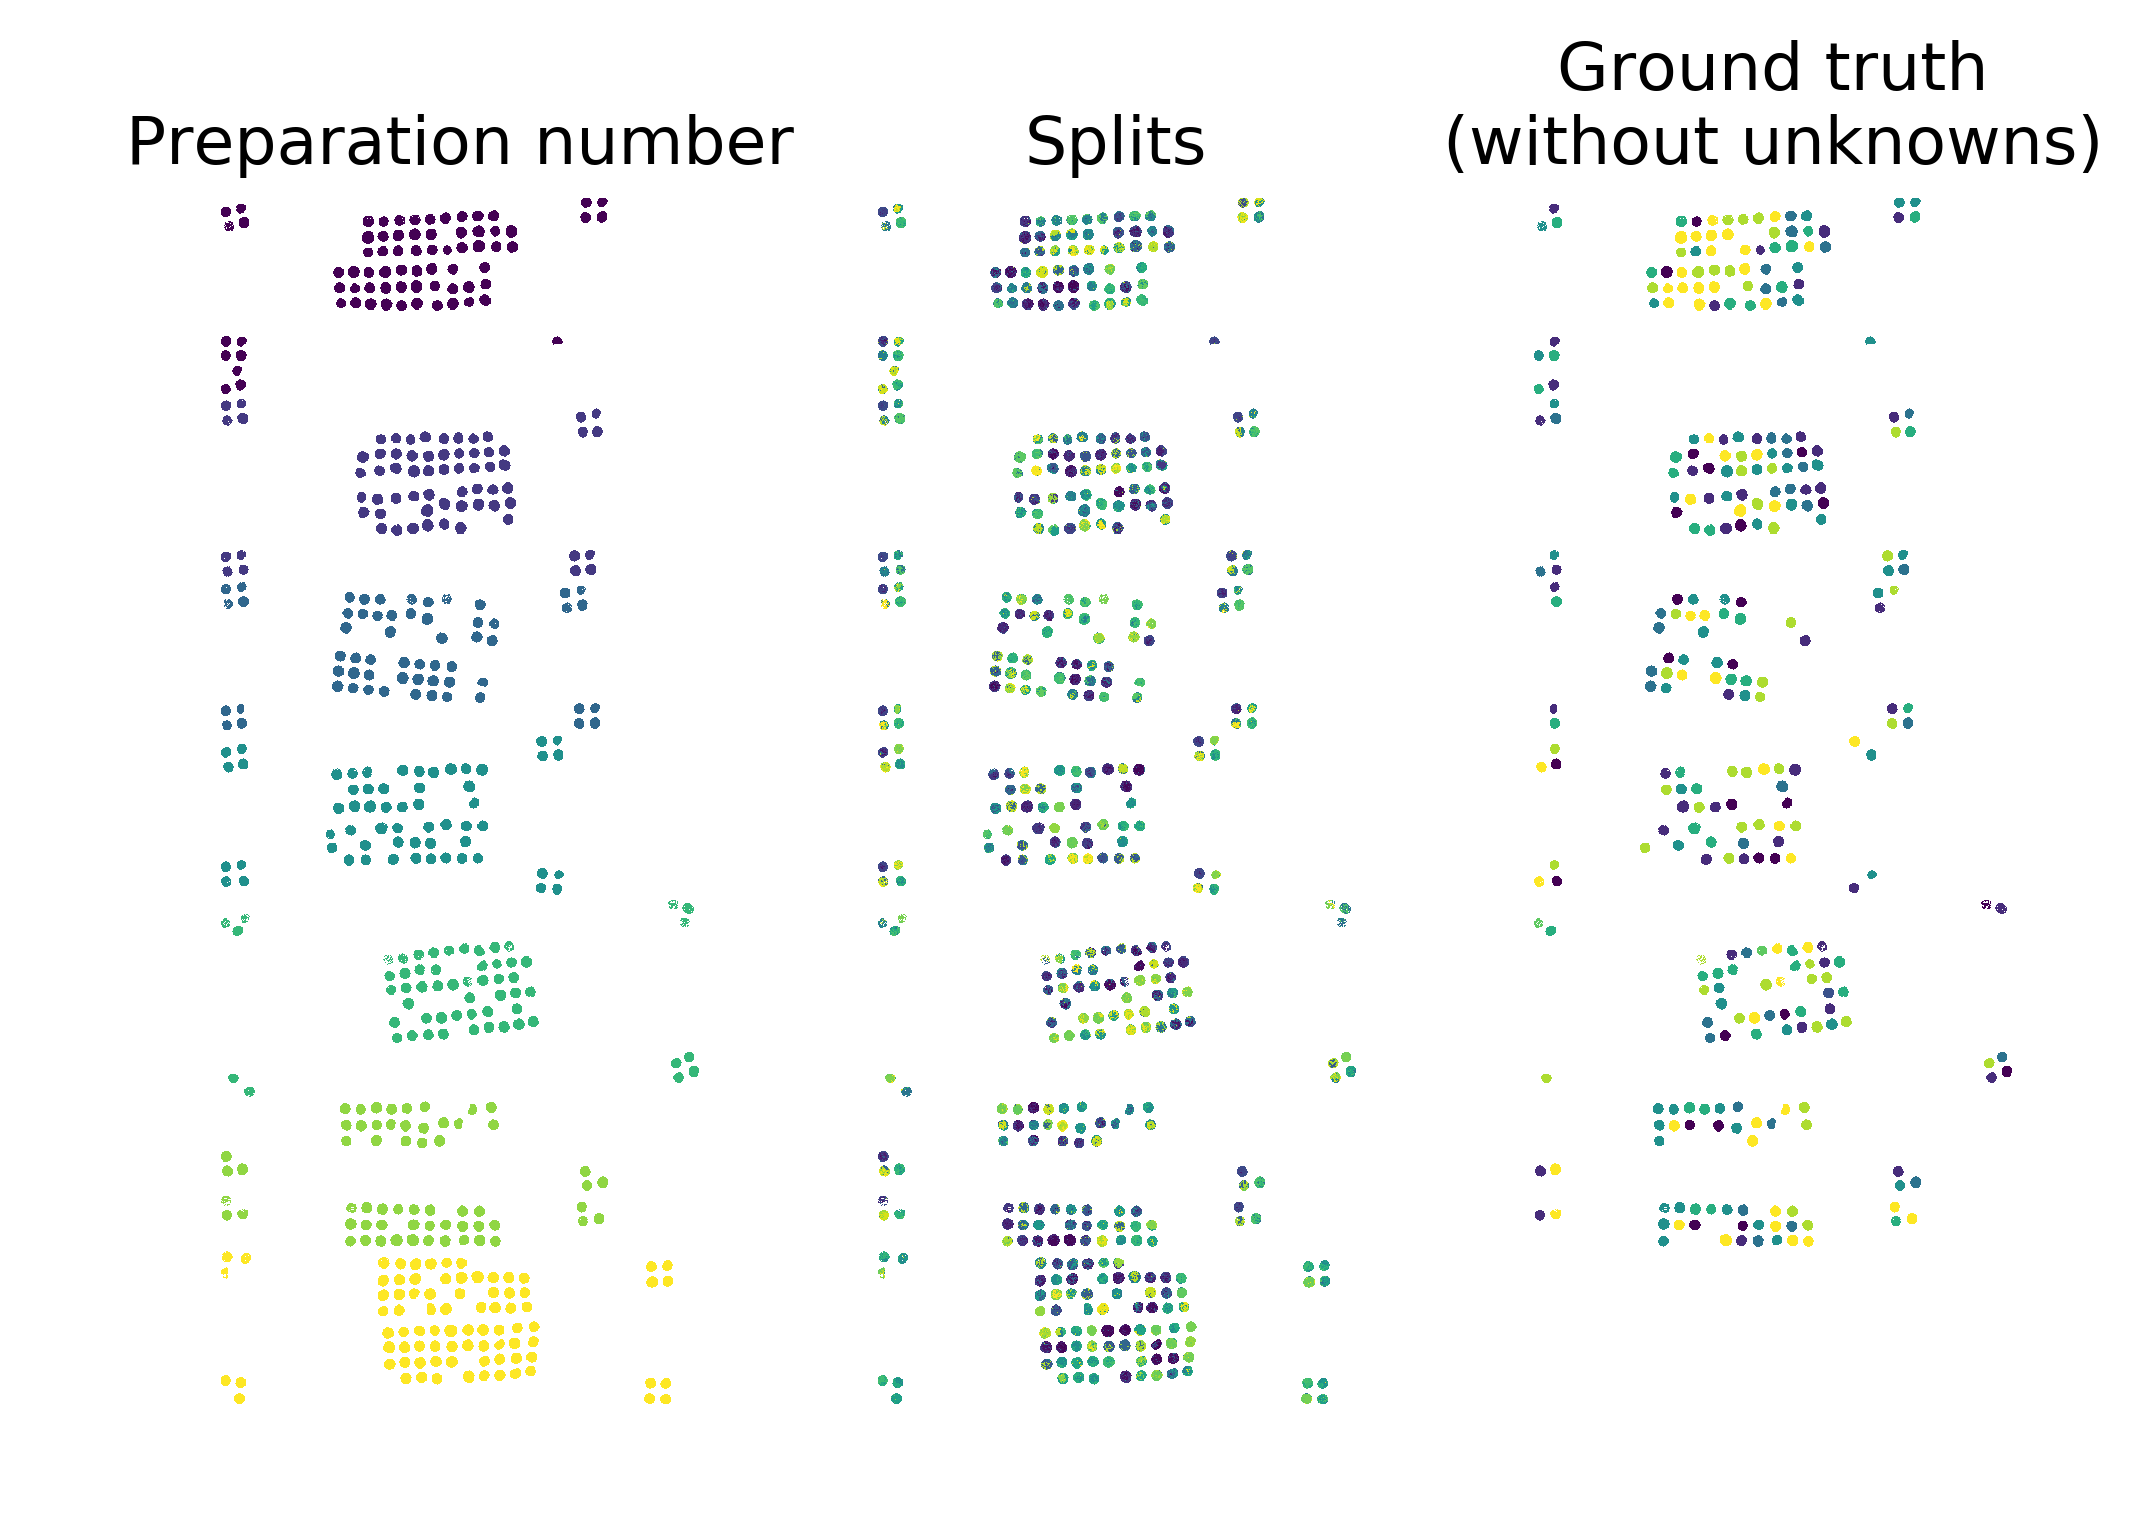

In [8]:
preparations = as_image(metadata.dataset, metadata.X, metadata.Y)

figure, axes = plt.subplots(1, 3)
axes[0].imshow(preparations)
axes[0].axis('off')
axes[0].set_title('Preparation number')

merged = smr.merged_partition(result)
# topmost = as_image(result.partition, metadata.X, metadata.Y)
topmost = as_image(merged, metadata.X, metadata.Y)

axes[1].imshow(topmost)
axes[1].axis('off')
axes[1].set_title('Splits')

diagnoses = np.unique(metadata.diagnosis)
print(diagnoses)
numerical_diagnosis = np.argmax(diagnoses[np.newaxis, :] == metadata.diagnosis[:, np.newaxis], axis=1).astype(float)
numerical_diagnosis[np.logical_or(metadata.diagnosis == '?', metadata.diagnosis == '????')] = np.nan
ground_truth = as_image(numerical_diagnosis, metadata.X, metadata.Y)
axes[2].imshow(ground_truth)
axes[2].axis('off')
axes[2].set_title('Ground truth\n(without unknowns)')

plt.show()

In [9]:
smr.statistic(merged, metadata.diagnosis, smr.dice)

KeyboardInterrupt: 

In [ ]:
smr.statistic(merged, metadata.diagnosis, smr.positive_predictive_value)

In [ ]:
smr.statistic(merged, metadata.diagnosis, smr.true_positive_rate)